In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df_train = pd.read_csv('D:\\Data Sets\\train.csv',index_col=0)
df_test = pd.read_csv('D:\\Data Sets\\test.csv',index_col=0)

C:\Users\Hp\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
df_train.head()

,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987


In [13]:
df_test.head()

,breath_id,R,C,time_step,u_in,u_out
id,,,,,,
1,0,5,20,0.000000,0.000000,0
2,0,5,20,0.031904,7.515046,0
3,0,5,20,0.063827,14.651675,0
4,0,5,20,0.095751,21.230610,0
5,0,5,20,0.127644,26.320956,0


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6036000 entries, 1 to 6036000
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   breath_id  int64  
 1   R          int64  
 2   C          int64  
 3   time_step  float64
 4   u_in       float64
 5   u_out      int64  
 6   pressure   float64
dtypes: float64(3), int64(4)
memory usage: 368.4 MB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024000 entries, 1 to 4024000
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   breath_id  int64  
 1   R          int64  
 2   C          int64  
 3   time_step  float64
 4   u_in       float64
 5   u_out      int64  
dtypes: float64(2), int64(4)
memory usage: 214.9 MB


In [16]:
df_train.isnull().sum()

breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

In [17]:
df_test.isnull().sum()

breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
dtype: int64

In [22]:
df_train.time_step.max()

2.9372379779815674

In [23]:
df_train.query('u_out == 0').time_step.max()

0.999798059463501

In [24]:
breath_one = df_train.query('breath_id == 1').reset_index(drop = True)
breath_one

,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,20,50,0.000000,0.083334,0,5.837492
1,1,20,50,0.033652,18.383041,0,5.907794
2,1,20,50,0.067514,22.509278,0,7.876254
3,1,20,50,0.101542,22.808822,0,11.742872
4,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...
75,1,20,50,2.553593,4.974474,1,6.399909
76,1,20,50,2.587754,4.978481,1,6.610815
77,1,20,50,2.621773,4.981847,1,6.329607
78,1,20,50,2.655746,4.984683,1,6.540513


In [25]:
breath_one.nunique().to_frame()

,0
breath_id,1
R,1
C,1
time_step,80
u_in,66
u_out,2
pressure,55


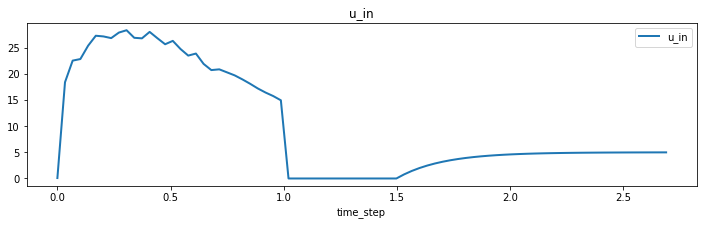

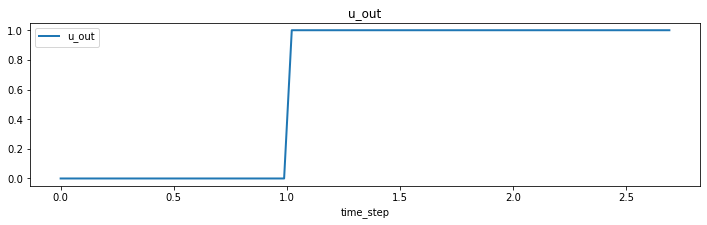

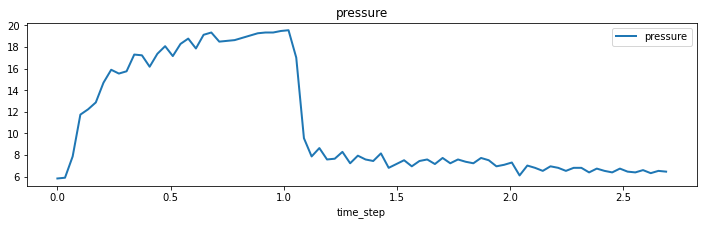

In [26]:
breath_one.plot(x="time_step", y="u_in", kind='line',figsize=(12,3), lw=2, title="u_in");
breath_one.plot(x="time_step", y="u_out", kind='line',figsize=(12,3), lw=2, title="u_out");
breath_one.plot(x="time_step", y="pressure", kind='line',figsize=(12,3), lw=2, title="pressure");

In [27]:
df_train.R.value_counts().to_frame()

,R
50,2410080
5,1988800
20,1637120


In [28]:
df_train.C.value_counts().to_frame()

,C
10,2244720
50,1971680
20,1819600


In [30]:
df_train.u_out.value_counts().to_frame()

,u_out
1,3745032
0,2290968


In [31]:
df_train.pressure.max()

64.8209917386395

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


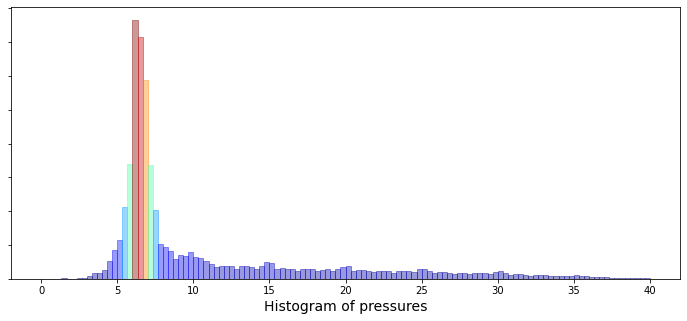

In [33]:
plt.figure(figsize = (12,5))
ax = sns.distplot(df_train['pressure'], 
             bins=120, 
             kde_kws={"clip":(0,40)}, 
             hist_kws={"range":(0,40)},
             color='darkcyan', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of pressures", size=14)
ax.set(yticklabels=[])
plt.show();

In [35]:
df_train.pressure.median()

7.032628177739799

In [36]:
train_data = df_train

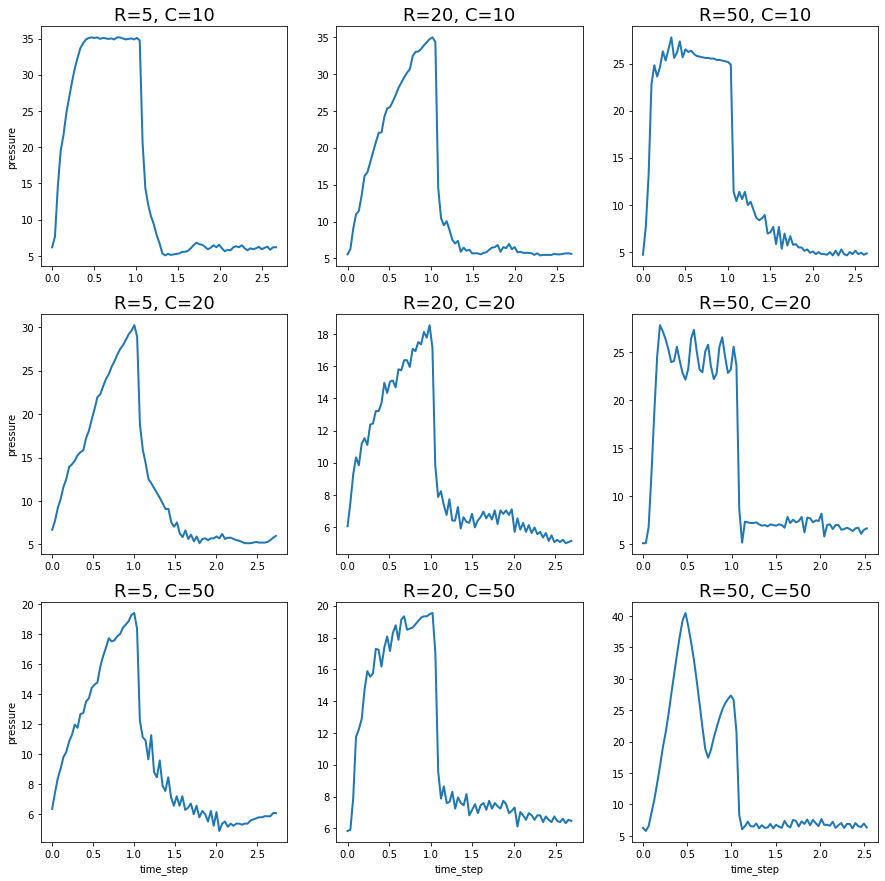

In [37]:
breath_2 = train_data.query('breath_id == 2').reset_index(drop = True)
breath_3 = train_data.query('breath_id == 3').reset_index(drop = True)
breath_4 = train_data.query('breath_id == 4').reset_index(drop = True)
breath_5 = train_data.query('breath_id == 5').reset_index(drop = True)
breath_17 = train_data.query('breath_id == 17').reset_index(drop = True)
breath_18 = train_data.query('breath_id == 18').reset_index(drop = True)
breath_21 = train_data.query('breath_id == 21').reset_index(drop = True)
breath_39 = train_data.query('breath_id == 39').reset_index(drop = True)

fig, axes = plt.subplots(3,3,figsize=(15,15))
sns.lineplot(data=breath_39, x="time_step", y="pressure", lw=2, ax=axes[0,0])
axes[0,0].set_title ("R=5, C=10", fontsize=18)
axes[0,0].set(xlabel='')
sns.lineplot(data=breath_21, x="time_step", y="pressure",  lw=2, ax=axes[0,1])
axes[0,1].set_title ("R=20, C=10", fontsize=18)
axes[0,1].set(xlabel='')
axes[0,1].set(ylabel='')
sns.lineplot(data=breath_18, x="time_step", y="pressure",  lw=2,ax=axes[0,2])
axes[0,2].set_title ("R=50, C=10", fontsize=18)
axes[0,2].set(xlabel='')
axes[0,2].set(ylabel='')
sns.lineplot(data=breath_17, x="time_step", y="pressure",  lw=2,ax=axes[1,0])
axes[1,0].set_title ("R=5, C=20", fontsize=18)
axes[1,0].set(xlabel='')
sns.lineplot(data=breath_2, x="time_step", y="pressure",  lw=2,ax=axes[1,1])
axes[1,1].set_title ("R=20, C=20", fontsize=18)
axes[1,1].set(xlabel='')
axes[1,1].set(ylabel='')
sns.lineplot(data=breath_3, x="time_step", y="pressure",  lw=2,ax=axes[1,2])
axes[1,2].set_title ("R=50, C=20", fontsize=18)
axes[1,2].set(xlabel='')
axes[1,2].set(ylabel='')
sns.lineplot(data=breath_5, x="time_step", y="pressure",  lw=2,ax=axes[2,0])
axes[2,0].set_title ("R=5, C=50", fontsize=18)
sns.lineplot(data=breath_one, x="time_step", y="pressure",  lw=2,ax=axes[2,1])
axes[2,1].set_title ("R=20, C=50", fontsize=18)
axes[2,1].set(ylabel='')
sns.lineplot(data=breath_4, x="time_step", y="pressure",  lw=2,ax=axes[2,2])
axes[2,2].set_title ("R=50, C=50", fontsize=18)
axes[2,2].set(ylabel='')
plt.show();

In [40]:
train_data = df_train

In [43]:
sample = pd.read_csv('D:\\Data Sets\\sample_submission.csv')

In [44]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc['pressure']
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble     import HistGradientBoostingRegressor
regressor  =  HistGradientBoostingRegressor()
regressor.fit(X_train, y_train)
sample["pressure"] = regressor.predict(df_test)
sample.to_csv('submission.csv',index=False)